<a href="https://colab.research.google.com/github/sampritich/samplerepo/blob/master/Multilayer_perceptron_using_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MultiLayer Perceptron**
# In the perceptron we just multiply with weights and add Bias, but we do this in one layer only.

# We update the weight when we found an error in classification or miss-classified. Weight update equation =
# weight = weight + learning_rate * (expected - predicted) * x

![alt text](https://miro.medium.com/proxy/1*S4FYCNkB0eOKR9OrcGu3Mw.jpeg)


**Activation function:**
# Activation functions also known non- linearity, describe the input-output relations in a non-linear way. This gives the model power to be more flexible in describing arbitrary relations. Here are popular activation functions. Sigmoid, Relu, Tanh and many more. I will describe these in my next blog.


**Training the Model-**
# There are basically three steps in the training of the model

1.   Forward pass
2.   Calculate error or loss
3.   Backward pass 




In [0]:
from __future__ import print_function


**Import Dataset**

In [0]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

**Import Libraries**

In [0]:
import tensorflow as tf
import matplotlib.pyplot as  plt


**Parameters**

In [0]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

**Network Parameters**

In [0]:

n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

**tf Graph input**

In [0]:

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


**Create model**

In [0]:

def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

**Store layers weight & bias**

In [0]:


weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

**Construct model**

In [0]:

pred = multilayer_perceptron(x, weights, biases)

**Define loss and optimizer**

In [0]:

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



**Initializing the variables**

In [0]:

init = tf.global_variables_initializer()

**Create an empty list to store the cost history and accuracy history**

In [0]:

cost_history = []
accuracy_history = []

**Launch the graph**

Epoch: 0001 - cost= 164.270959788 - Accuracy= 0.8551
Epoch: 0002 - cost= 39.560335751 - Accuracy= 0.8927
Epoch: 0003 - cost= 24.742870838 - Accuracy= 0.9098
Epoch: 0004 - cost= 17.221716094 - Accuracy= 0.9213
Epoch: 0005 - cost= 12.541566000 - Accuracy= 0.9234
Epoch: 0006 - cost= 9.314079774 - Accuracy= 0.9255
Epoch: 0007 - cost= 7.089744009 - Accuracy= 0.931
Epoch: 0008 - cost= 5.449201601 - Accuracy= 0.9353
Epoch: 0009 - cost= 4.069390780 - Accuracy= 0.9368
Epoch: 0010 - cost= 2.917721853 - Accuracy= 0.9412
Epoch: 0011 - cost= 2.314672520 - Accuracy= 0.9401
Epoch: 0012 - cost= 1.650217502 - Accuracy= 0.942
Epoch: 0013 - cost= 1.334398970 - Accuracy= 0.9411
Epoch: 0014 - cost= 1.093381639 - Accuracy= 0.9438
Epoch: 0015 - cost= 0.835553241 - Accuracy= 0.944
Optimization Finished!


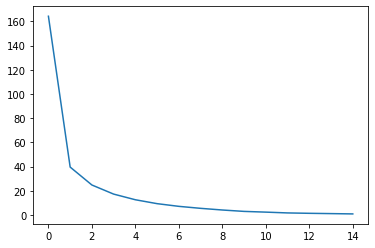

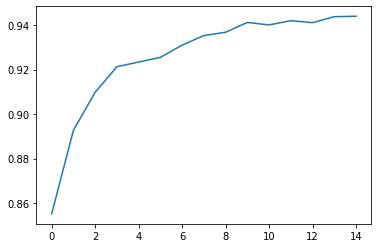

Accuracy: 0.944


In [0]:
with tf.Session() as sess:
    sess.run(init) 
 # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:

            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            # Calculate accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            acu_temp = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
            #append the accuracy to the list
            accuracy_history.append(acu_temp)
            #append the cost history
            cost_history.append(avg_cost)
            print("Epoch:", '%04d' % (epoch + 1), "- cost=", "{:.9f}".format(avg_cost), "- Accuracy=",acu_temp)


    print("Optimization Finished!")
    #plot the cost history
    plt.plot(cost_history)
    plt.show()
    #plot the accuracy history
    plt.plot(accuracy_history)
    plt.show()
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))